In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Importing dataframe
path = r"/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Prepared Data/Cleaned_flavors_of_cacao.csv"
df=pd.read_csv(path)  

In [17]:
df.head

<bound method NDFrame.head of      Company  (Maker-if known)             BarName   REF  ReviewDate  \
0                     A. Morin         Agua Grande  1876  2016-01-01   
1                     A. Morin               Kpime  1676  2015-01-01   
2                     A. Morin              Atsane  1676  2015-01-01   
3                     A. Morin               Akata  1680  2015-01-01   
4                     A. Morin              Quilla  1704  2015-01-01   
...                        ...                 ...   ...         ...   
1790                    Zotter                Peru   647  2011-01-01   
1791                    Zotter               Congo   749  2011-01-01   
1792                    Zotter        Kerala State   749  2011-01-01   
1793                    Zotter        Kerala State   781  2011-01-01   
1794                    Zotter  Brazil, Mitzi Blue   486  2010-01-01   

      CocoaPercent Location  Rating   BeanType BroadOrigin  Decade  
0             0.63   France    3.75 

In [24]:
df = df[['CocoaPercent', 'Rating']].dropna()

In [28]:
df['CocoaPercent'] = df['CocoaPercent'] * 100  # Convert from 0.63 → 63

### Hypothesis

Hypothesize that higher cocoa percentages are associated with higher chocolate ratings.

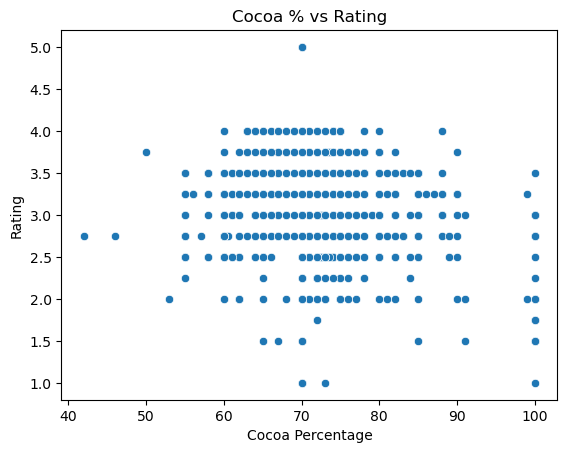

In [30]:
sns.scatterplot(data=df, x='CocoaPercent', y='Rating')
plt.title('Cocoa % vs Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.show()

In [32]:
X = df[['CocoaPercent']].values  # 2D array
y = df['Rating'].values          # 1D array

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

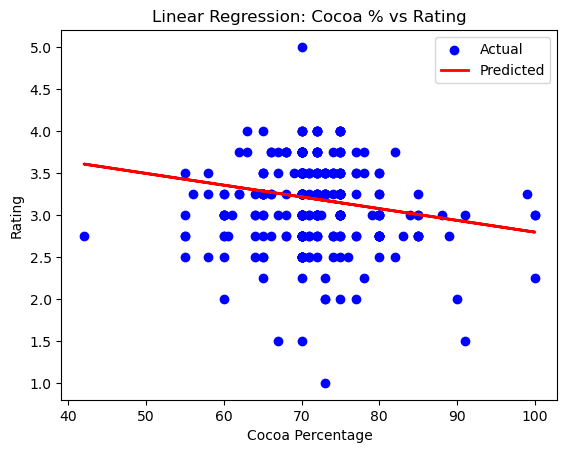

In [42]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.title('Linear Regression: Cocoa % vs Rating')
plt.legend()
plt.show()

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.23146324101198754
R² Score: -0.0012994533814203457


In [46]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
comparison.head()

,Actual,Predicted
0,3.00,3.144406
1,3.75,3.214299
2,3.50,3.214299
3,3.50,3.172363
4,3.00,3.214299


### Model Interpretation

The regression line shows a [weak/moderate/strong] fit, with an R² score of [insert value].

This suggests that cocoa percentage explains [x]% of the variation in chocolate ratings. The model may be limited due to other influencing factors like ingredients, origin, or brand reputation.

### Reflections on Bias

There may be bias in the data due to subjective human ratings or underrepresentation of certain countries or manufacturers. This could affect the accuracy of the regression model.
